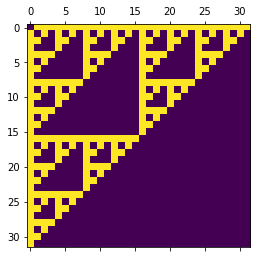

In [26]:
import time
from cffi import FFI
from array2gif import write_gif
import numpy as np
import random
import matplotlib.pyplot as plt

binary      = 'sierp0.bin'

with open(binary, "rb") as f:
    prog = f.read()
    
# init nv6502
def init(ffi):
    _nv6502 = ffi.dlopen("./nv6502.so");
    return _nv6502

def execute(prog): 
    ffi = FFI()
    ffi.cdef("""
       typedef uint8_t u8;
       void run(int num_blocks, int threads_per_block, int steps, int iters, const char *name);
       extern u8 mem[4][0x1000];
    """)
    
    C = init(ffi)
    C.run(1, 4, 5000, 1, b'sierp0.bin')
    _scr = np.zeros((1024,1), dtype='uint8')
    for i in range(0x200, 0x600): _scr[i-0x200] = C.mem[0][i]
    _scr = _scr.reshape(32,32)
    plt.matshow(_scr)
    
execute('')


In [ ]:
# we just a 6502 emulator on GPU